In [1]:
import pandas as pd
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = arff.loadarff('data/Airlines_fixed.arff')

In [3]:
data_df = pd.DataFrame(data[0])

In [4]:
data_df['UniqueCarrier'] = data_df['UniqueCarrier'].str.decode('utf-8')
data_df['FlightNum'] = data_df['FlightNum'].str.decode('utf-8')
data_df['Origin'] = data_df['Origin'].str.decode('utf-8')
data_df['Dest'] = data_df['Dest'].str.decode('utf-8')

### Provide an overview of the dataset size, features, and distribution of feature values

In [5]:
data_df['Class'] = (data_df['ArrDelay'] > 0).astype(int)

In [6]:
#Scheduled Departure Time -> CRSDepTime
data_df['CRSDepTime'] = data_df['CRSDepTime'].astype(int).astype(str).str.zfill(4)
data_df['CRSDepTime'] = data_df['CRSDepTime'].str[:2] + ':' + data_df['CRSDepTime'].str[2:]


In [7]:
data_df['Flight'] = data_df['UniqueCarrier'] + data_df['FlightNum'].astype(str).str.rstrip('.0')

In [50]:
data_df['ArrDelay'].apply(lambda x: 1 if x > 0 else 0).value_counts()

ArrDelay
0    51474
1    48687
Name: count, dtype: int64

In [51]:
data_df

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay,Class,Flight
0,5.0,06:00,UA,899.0,ORD,IAD,-3.0,0,UA899
1,5.0,06:15,DL,357.0,IAD,ATL,5.0,1,DL357
2,5.0,06:15,UA,341.0,IAD,DEN,8.0,1,UA341
3,5.0,06:25,CO,581.0,IAD,DEN,44.0,1,CO581
4,5.0,06:30,UA,902.0,CLE,IAD,-10.0,0,UA902
...,...,...,...,...,...,...,...,...,...
100156,6.0,21:40,UA,30.0,LAX,IAD,-19.0,0,UA3
100157,6.0,21:40,CO,896.0,LAX,IAD,-23.0,0,CO896
100158,6.0,21:50,UA,1094.0,IAD,BDL,-14.0,0,UA1094
100159,6.0,21:55,US,394.0,PIT,IAD,9.0,1,US394


In [8]:
time_windows = [(0, 599), (600, 1159), (1200, 1759), (1800, 2359)]
labels = ['Late Night', 'Morning', 'Afternoon', 'Evening']

data_df['CRSDepTime'] = pd.to_datetime(data_df['CRSDepTime'], format='%H:%M')

def assign_time_window(crstime):
    for i, (start, end) in enumerate(time_windows):
        if start <= crstime.hour * 100 + crstime.minute <= end:
            return labels[i]
    return 'Other'

# Create a 'TimeWindow' column based on the time ranges
data_df['TimeWindow'] = data_df['CRSDepTime'].apply(assign_time_window)


In [9]:
data_df

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay,Class,Flight,TimeWindow
0,5.0,1900-01-01 06:00:00,UA,899.0,ORD,IAD,-3.0,0,UA899,Morning
1,5.0,1900-01-01 06:15:00,DL,357.0,IAD,ATL,5.0,1,DL357,Morning
2,5.0,1900-01-01 06:15:00,UA,341.0,IAD,DEN,8.0,1,UA341,Morning
3,5.0,1900-01-01 06:25:00,CO,581.0,IAD,DEN,44.0,1,CO581,Morning
4,5.0,1900-01-01 06:30:00,UA,902.0,CLE,IAD,-10.0,0,UA902,Morning
...,...,...,...,...,...,...,...,...,...,...
100156,6.0,1900-01-01 21:40:00,UA,30.0,LAX,IAD,-19.0,0,UA3,Evening
100157,6.0,1900-01-01 21:40:00,CO,896.0,LAX,IAD,-23.0,0,CO896,Evening
100158,6.0,1900-01-01 21:50:00,UA,1094.0,IAD,BDL,-14.0,0,UA1094,Evening
100159,6.0,1900-01-01 21:55:00,US,394.0,PIT,IAD,9.0,1,US394,Evening


In [10]:
data_df['DayofWeek'] = data_df['DayofWeek'].astype(int)

data_df['FlightNum'] = data_df['FlightNum'].astype(str).str.rstrip('.0')
data_df['FlightNum'] = data_df['FlightNum'].astype(int)

data_df['ArrDelay'] = data_df['ArrDelay'].astype(int)

In [55]:
data_df.dtypes

DayofWeek                 int64
CRSDepTime       datetime64[ns]
UniqueCarrier            object
FlightNum                 int64
Origin                   object
Dest                     object
ArrDelay                  int64
Class                     int64
Flight                   object
TimeWindow               object
dtype: object

In [56]:
data_df['FlightNum'].value_counts()

FlightNum
16      723
1021    715
1043    703
172     701
1554    696
       ... 
1765      1
12        1
1616      1
1739      1
574       1
Name: count, Length: 611, dtype: int64

In [57]:
data_df['Flight'].value_counts()

Flight
UA1043    703
UA1554    696
UA1294    685
UA1425    673
US172     648
         ... 
AA528       1
AA376       1
UA1739      1
UA1775      1
AA568       1
Name: count, Length: 706, dtype: int64

In [61]:
data_df['UniqueCarrier'].value_counts()

UniqueCarrier
UA    63706
CO     9219
AA     8620
NW     5521
DL     4793
US     3513
TW     3056
EA     1420
PA      313
Name: count, dtype: int64

In [17]:
# this checks if i have duplicates
data_df.value_counts()

#we can drop the duplicates because we dont have the date , we only have the time, so it is common for flights to have the same time in diferend days of the month

DayofWeek  CRSDepTime           UniqueCarrier  FlightNum  Origin  Dest  ArrDelay  Class  Flight  TimeWindow
6          1900-01-01 11:20:00  US             348        PHF     IAD    0        0      US348   Morning       7
7          1900-01-01 10:10:00  US             172        IAD     PHF   -5        0      US172   Morning       6
5          1900-01-01 11:35:00  US             53         PHF     IAD   -5        0      US53    Morning       6
3          1900-01-01 11:45:00  UA             1427       BDL     IAD   -3        0      UA1427  Morning       6
1          1900-01-01 08:00:00  CO             1094       IAH     IAD   -5        0      CO1094  Morning       6
                                                                                                              ..
3          1900-01-01 13:25:00  CO             1287       IAH     IAD   -18       0      CO1287  Afternoon     1
                                                                        -19       0      CO1287  Afte

We cant drop the duplicates because we dont have the date , we only have the time, so it is common for flights to have the same time in diferend days of the month

We can also see from the above that fro the assotiation rules we may use the collums of UniqueCarrier ,TimeWindow ,Origin ,Dest

In [18]:
data_df['ArrDelay'].describe()

count    100161.000000
mean          4.638462
std          23.397863
min         -72.000000
25%          -7.000000
50%           0.000000
75%           9.000000
max         667.000000
Name: ArrDelay, dtype: float64

<Axes: ylabel='Frequency'>

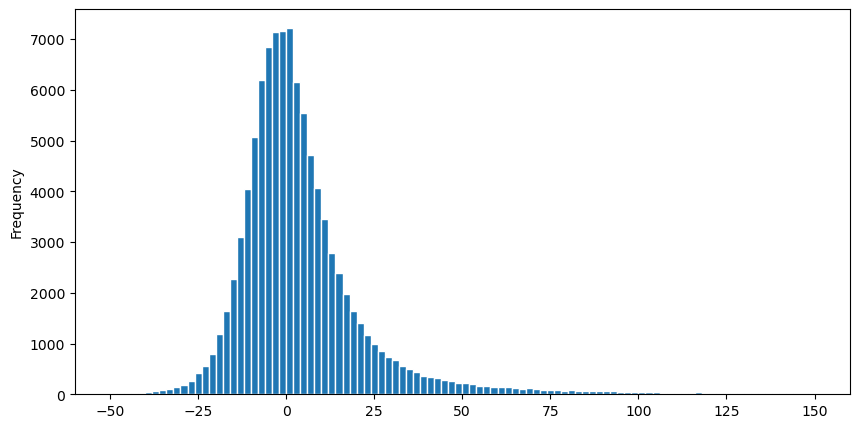

In [72]:
data_df['ArrDelay'].plot.hist(bins=100, figsize=(10,5), edgecolor='white',range=[-50,150])

<Axes: ylabel='Frequency'>

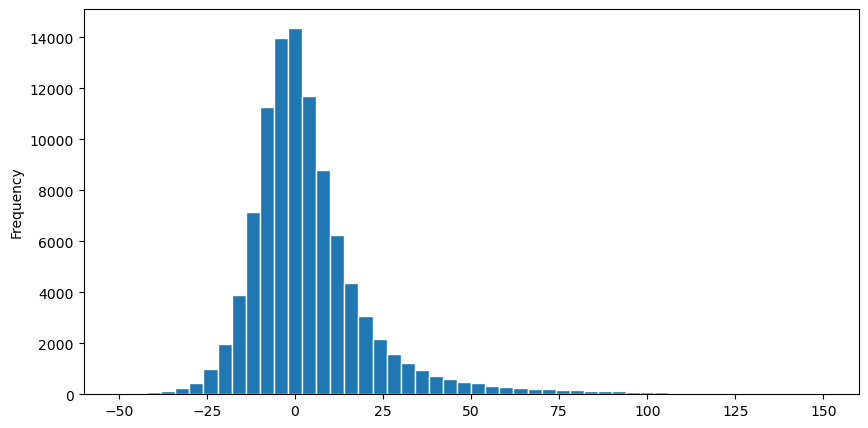

In [74]:
data_df['ArrDelay'].plot.hist(bins=50, figsize=(10,5), edgecolor='white',range=[-50,150])

In [78]:
data_df[data_df["ArrDelay"] == 0]

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay,Class,Flight,TimeWindow
9,5,1900-01-01 06:45:00,UA,1021,BOS,IAD,0,0,UA1021,Morning
25,5,1900-01-01 07:20:00,NW,769,IAD,DTW,0,0,NW769,Morning
29,5,1900-01-01 07:35:00,UA,1552,GSO,IAD,0,0,UA1552,Morning
34,5,1900-01-01 08:00:00,US,591,IAD,PIT,0,0,US591,Morning
98,5,1900-01-01 11:20:00,US,155,PHF,IAD,0,0,US155,Morning
...,...,...,...,...,...,...,...,...,...,...
100004,6,1900-01-01 10:45:00,UA,147,CHS,IAD,0,0,UA147,Morning
100037,6,1900-01-01 12:45:00,UA,101,IAD,MHT,0,0,UA101,Afternoon
100081,6,1900-01-01 15:05:00,UA,1257,BUF,IAD,0,0,UA1257,Afternoon
100123,6,1900-01-01 17:10:00,AA,236,ORD,IAD,0,0,AA236,Afternoon


In [11]:
min_delay = data_df['ArrDelay'].min()
max_delay = data_df['ArrDelay'].max()

In [12]:
min_delay, max_delay

(-72, 667)

In [13]:
df = data_df.copy()

In [14]:
# buckets for delays
bins = [(min_delay -1), -20, -5, 5, 20, 60, (max_delay+1)]
labels = ['Really Early', 'Early', 'On Time', 'Late', 'Really Late', 'Really Really Late']

df['Status'] = pd.cut(df['ArrDelay'], bins=bins, labels=labels)

In [15]:
df.head()

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay,Class,Flight,TimeWindow,Status
0,5,1900-01-01 06:00:00,UA,899,ORD,IAD,-3,0,UA899,Morning,On Time
1,5,1900-01-01 06:15:00,DL,357,IAD,ATL,5,1,DL357,Morning,On Time
2,5,1900-01-01 06:15:00,UA,341,IAD,DEN,8,1,UA341,Morning,Late
3,5,1900-01-01 06:25:00,CO,581,IAD,DEN,44,1,CO581,Morning,Really Late
4,5,1900-01-01 06:30:00,UA,902,CLE,IAD,-10,0,UA902,Morning,Early


In [18]:
df["Status"].value_counts()

Status
On Time               33225
Early                 29812
Late                  21785
Really Late            9328
Really Early           3350
Really Really Late     2661
Name: count, dtype: int64

In [16]:
df['CRSDepTime'] = df['CRSDepTime'].dt.strftime('%H:%M')

In [17]:
df

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay,Class,Flight,TimeWindow,Status
0,5,06:00,UA,899,ORD,IAD,-3,0,UA899,Morning,On Time
1,5,06:15,DL,357,IAD,ATL,5,1,DL357,Morning,On Time
2,5,06:15,UA,341,IAD,DEN,8,1,UA341,Morning,Late
3,5,06:25,CO,581,IAD,DEN,44,1,CO581,Morning,Really Late
4,5,06:30,UA,902,CLE,IAD,-10,0,UA902,Morning,Early
...,...,...,...,...,...,...,...,...,...,...,...
100156,6,21:40,UA,3,LAX,IAD,-19,0,UA3,Evening,Early
100157,6,21:40,CO,896,LAX,IAD,-23,0,CO896,Evening,Really Early
100158,6,21:50,UA,1094,IAD,BDL,-14,0,UA1094,Evening,Early
100159,6,21:55,US,394,PIT,IAD,9,1,US394,Evening,Late


In [21]:
data_df.groupby('TimeWindow')['Class'].sum()

TimeWindow
Afternoon     21098
Evening       11391
Late Night       55
Morning       16143
Name: Class, dtype: int64

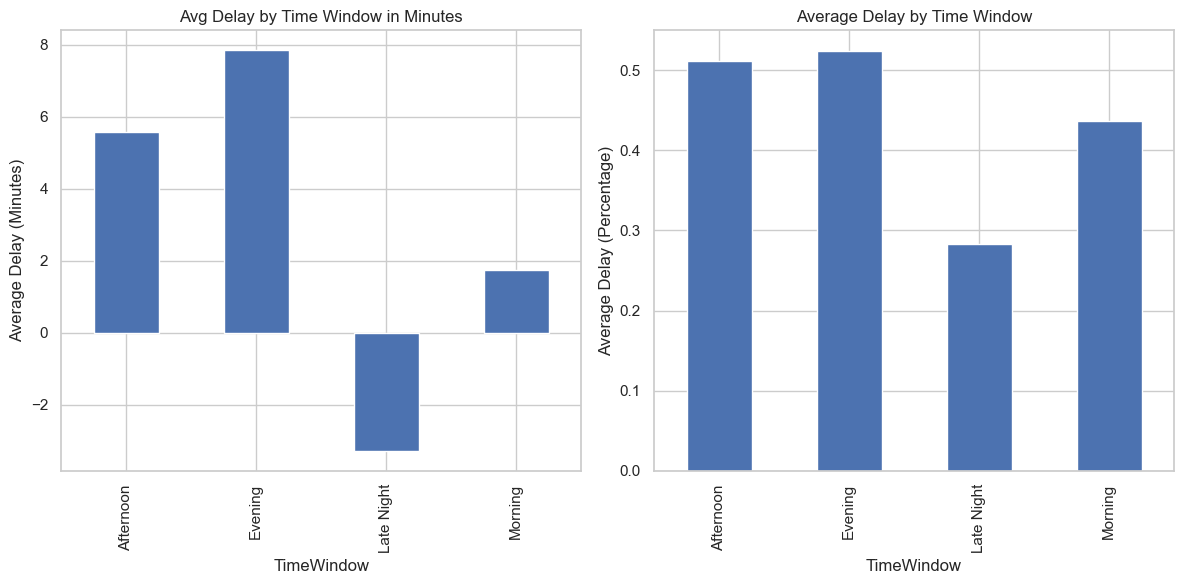

In [188]:
# Calculate average delay for each time window

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Avg Delay by Time Window in Minutes
average_delay_minutes = df.groupby('TimeWindow')['ArrDelay'].mean()
average_delay_minutes.plot(kind='bar', ax=axes[0], title='Avg Delay by Time Window in Minutes')
axes[0].set_ylabel('Average Delay (Minutes)')

# Average Delay by Time Window as Percentage
average_delay_percentage = df.groupby('TimeWindow')['Class'].mean()
average_delay_percentage.plot(kind='bar', ax=axes[1], title='Average Delay by Time Window')
axes[1].set_ylabel('Average Delay (Percentage)')

# Adjust layout
plt.tight_layout()
plt.show()


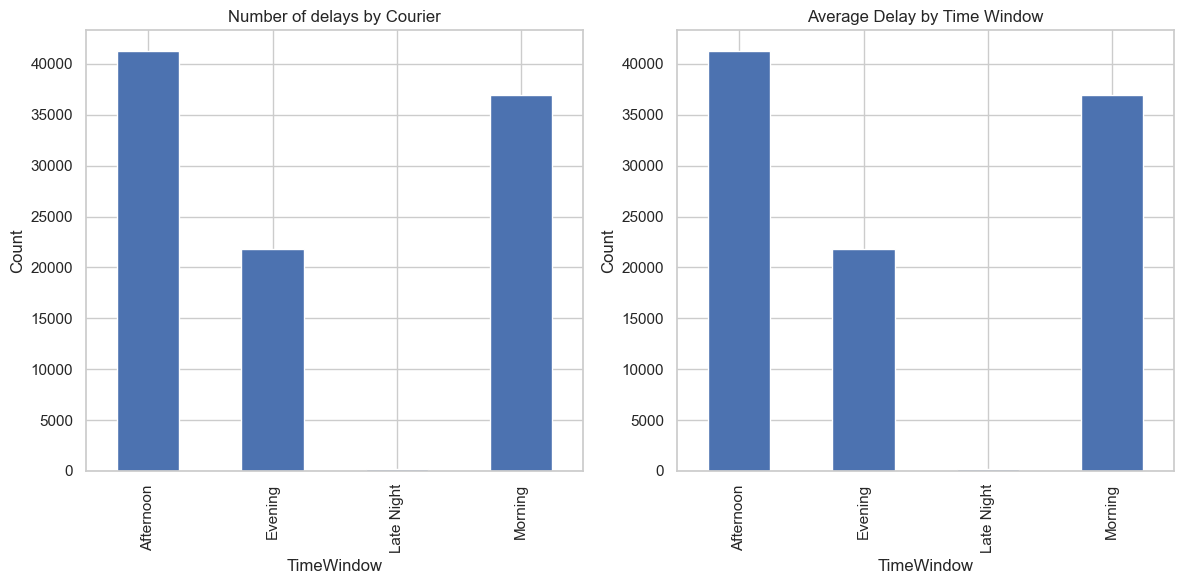

In [187]:
# Calculate average delay for each time window

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Number of delays by Courier
count_by_courier = df.groupby('TimeWindow')['UniqueCarrier'].count()
count_by_courier.plot(kind='bar', ax=axes[0], title='Number of delays by Courier')
axes[0].set_ylabel('Count')

# Average Delay by Time Window
average_delay = df.groupby('TimeWindow')['UniqueCarrier'].count()
average_delay.plot(kind='bar', ax=axes[1], title='Average Delay by Time Window')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


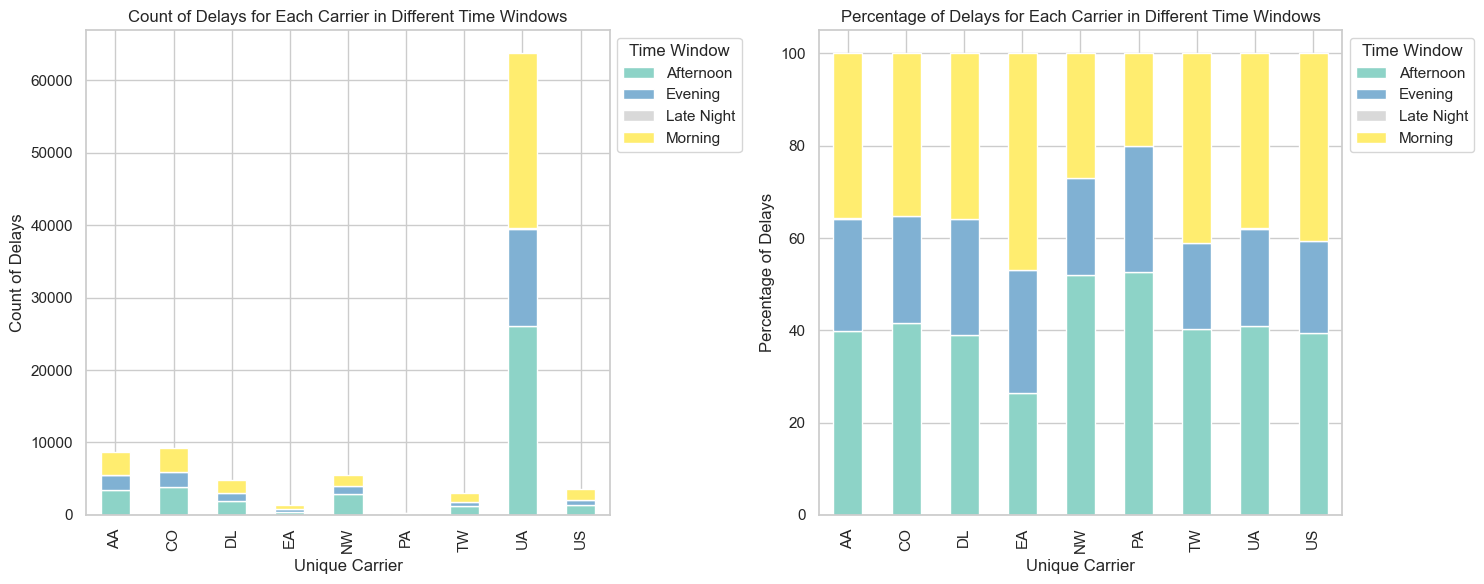

In [167]:
# Count the delays for each carrier and time window
delay_counts = df.groupby(['UniqueCarrier', 'TimeWindow']).size().unstack(fill_value=0)

# Calculate the percentage of delays for each carrier and time window
delay_percentages = df.groupby(['UniqueCarrier', 'TimeWindow']).size() / df.groupby('UniqueCarrier').size()
delay_percentages = delay_percentages.unstack(fill_value=0) * 100

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.set(style="whitegrid")
sns.color_palette("Set3")
delay_counts.plot(kind='bar', stacked=True, colormap='Set3', ax=axes[0])
axes[0].set_title('Count of Delays for Each Carrier in Different Time Windows')
axes[0].set_xlabel('Unique Carrier')
axes[0].set_ylabel('Count of Delays')
axes[0].legend(title='Time Window', bbox_to_anchor=(1, 1))

sns.set(style="whitegrid")
sns.color_palette("Set3")
delay_percentages.plot(kind='bar', stacked=True, colormap='Set3', ax=axes[1])
axes[1].set_title('Percentage of Delays for Each Carrier in Different Time Windows')
axes[1].set_xlabel('Unique Carrier')
axes[1].set_ylabel('Percentage of Delays')
axes[1].legend(title='Time Window', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [146]:
df_class_1 = df[df["Class"] == 1]
df_class_0 = df[df["Class"] == 0]

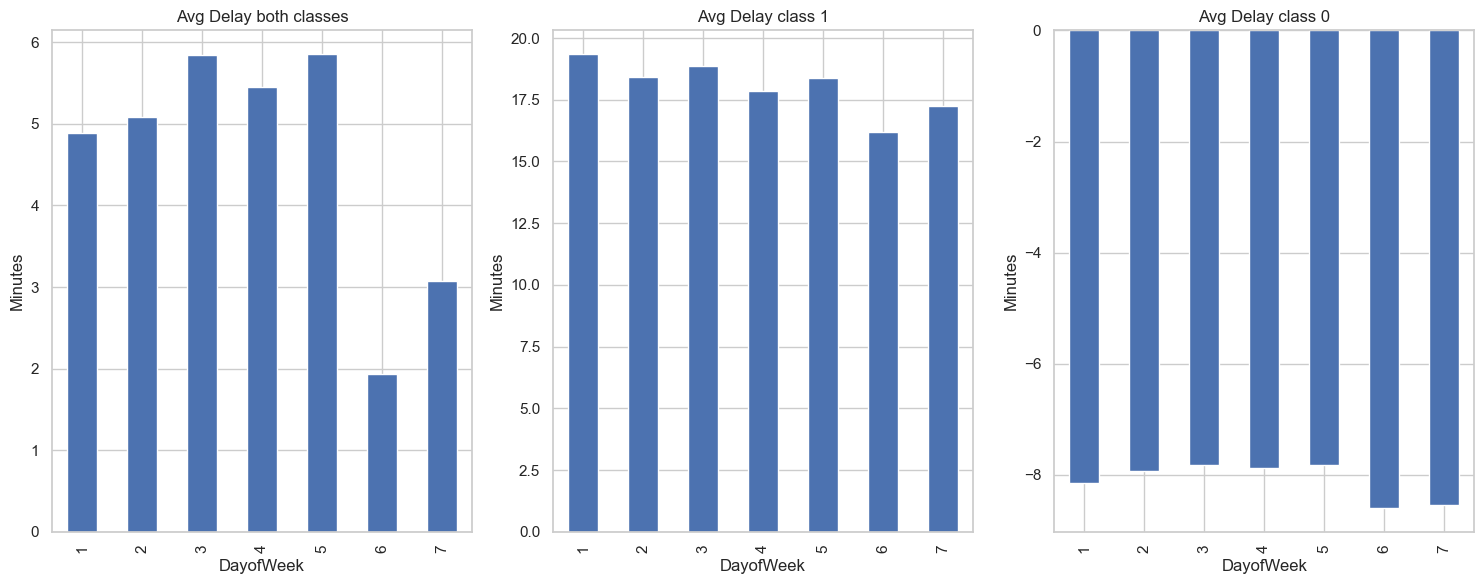

In [186]:
# Calculate average delay 

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Average Delay for all classes
average_delay_minutes = df.groupby('DayofWeek')['ArrDelay'].mean()
average_delay_minutes.plot(kind='bar', ax=axes[0], title='Avg Delay both classes')
axes[0].set_ylabel('Minutes')

# Average Delay for class 1
average_delay_minutes_class_1 = df_class_1.groupby('DayofWeek')['ArrDelay'].mean()
average_delay_minutes_class_1.plot(kind='bar', ax=axes[1], title='Avg Delay class 1')
axes[1].set_ylabel('Minutes')

# Average Delay for class 0
average_delay_minutes_class_0 = df_class_0.groupby('DayofWeek')['ArrDelay'].mean()
average_delay_minutes_class_0.plot(kind='bar', ax=axes[2], title='Avg Delay class 0')
axes[2].set_ylabel('Minutes')

# Adjust layout
plt.tight_layout()
plt.show()


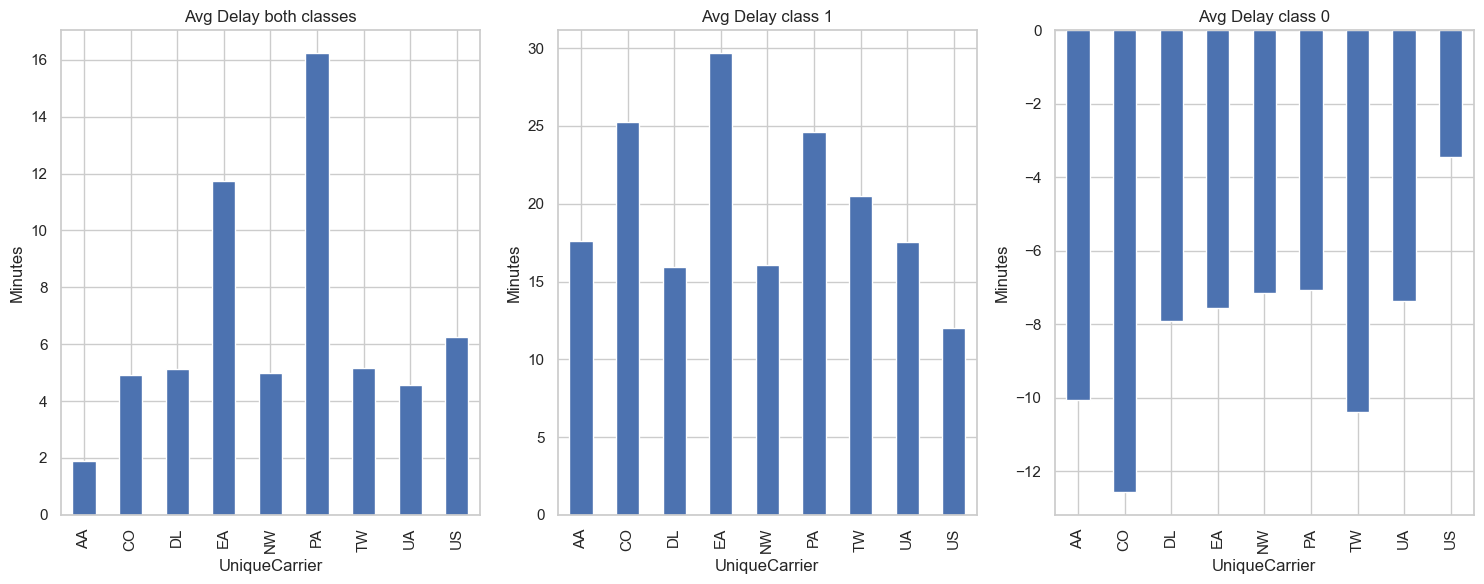

In [185]:
# Calculate average delay 

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Average Delay for all classes
average_delay_minutes = df.groupby('UniqueCarrier')['ArrDelay'].mean()
average_delay_minutes.plot(kind='bar', ax=axes[0], title='Avg Delay both classes')
axes[0].set_ylabel('Minutes')

# Average Delay for class 1
average_delay_minutes_class_1 = df_class_1.groupby('UniqueCarrier')['ArrDelay'].mean()
average_delay_minutes_class_1.plot(kind='bar', ax=axes[1], title='Avg Delay class 1')
axes[1].set_ylabel('Minutes')

# Average Delay for class 0
average_delay_minutes_class_0 = df_class_0.groupby('UniqueCarrier')['ArrDelay'].mean()
average_delay_minutes_class_0.plot(kind='bar', ax=axes[2], title='Avg Delay class 0')
axes[2].set_ylabel('Minutes')

# Adjust layout
plt.tight_layout()
plt.show()


In [119]:
df.groupby('UniqueCarrier')['Status'].count()

UniqueCarrier
AA     8620
CO     9218
DL     4793
EA     1420
NW     5521
PA      313
TW     3056
UA    63706
US     3513
Name: Status, dtype: int64

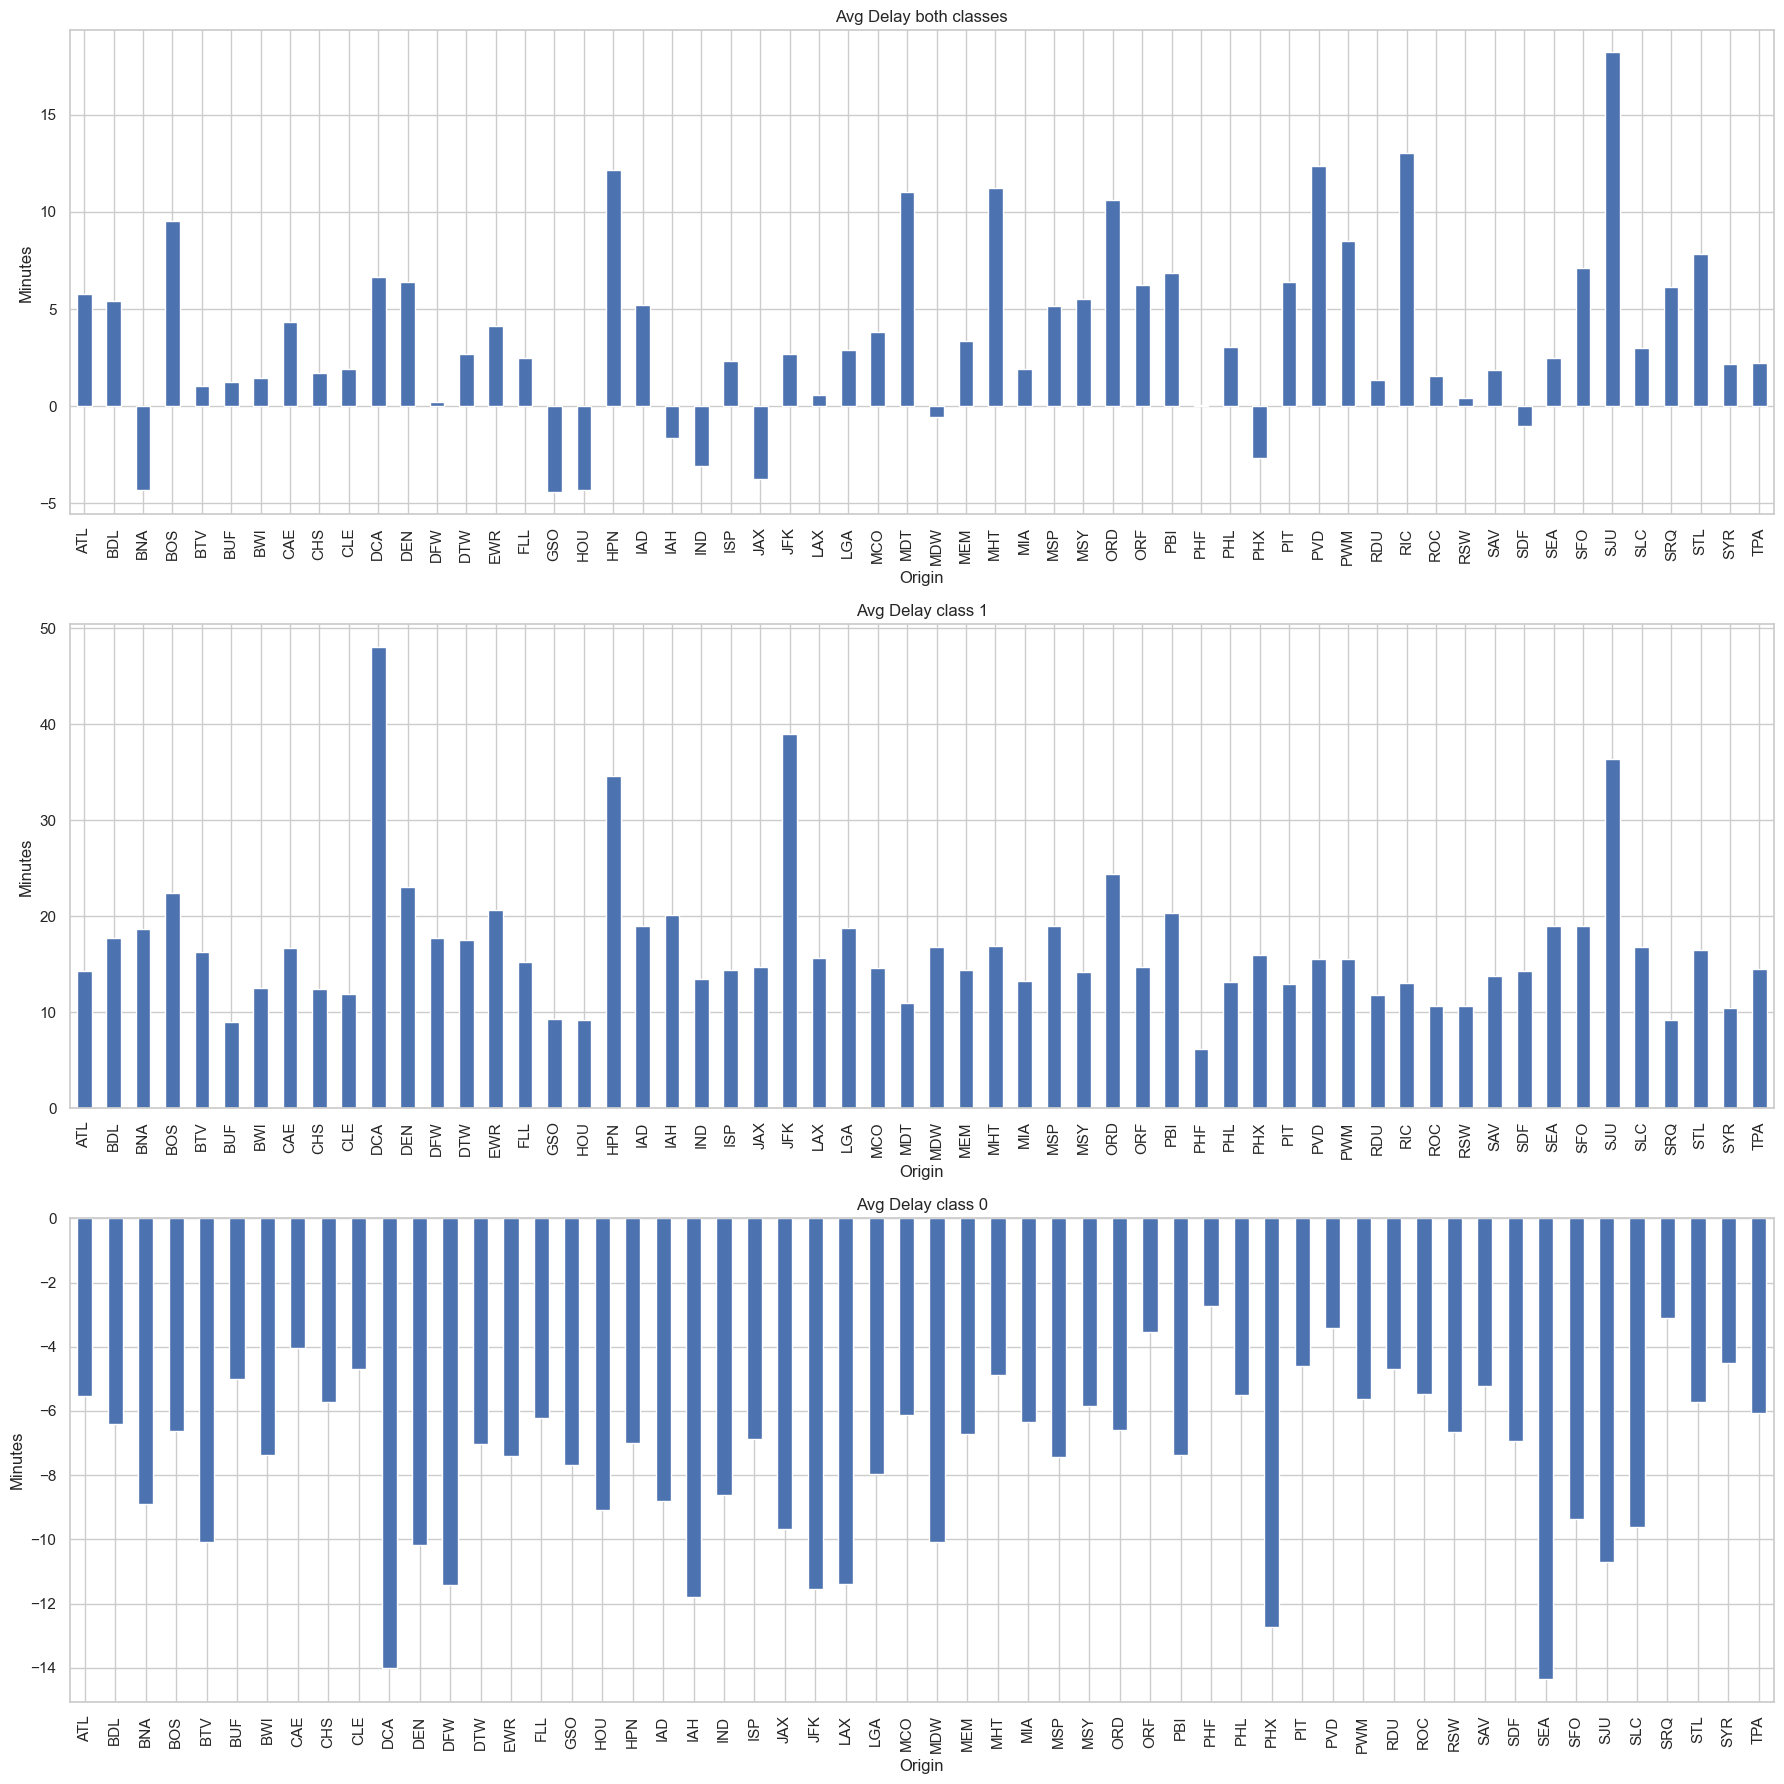

In [191]:
# Calculate average delay 

# Set up subplots in a vertical arrangement
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 18))

# Avg Delay both classes
average_delay_minutes = df.groupby('Origin')['ArrDelay'].mean()
average_delay_minutes.plot(kind='bar', ax=axes[0], title='Avg Delay both classes')
axes[0].set_ylabel('Minutes')

# Avg Delay class 1
average_delay_minutes_class_1 = df_class_1.groupby('Origin')['ArrDelay'].mean()
average_delay_minutes_class_1.plot(kind='bar', ax=axes[1], title='Avg Delay class 1')
axes[1].set_ylabel('Minutes')

# Avg Delay class 0
average_delay_minutes_class_0 = df_class_0.groupby('Origin')['ArrDelay'].mean()
average_delay_minutes_class_0.plot(kind='bar', ax=axes[2], title='Avg Delay class 0')
axes[2].set_ylabel('Minutes')

# Adjust layout
plt.tight_layout()
plt.show()


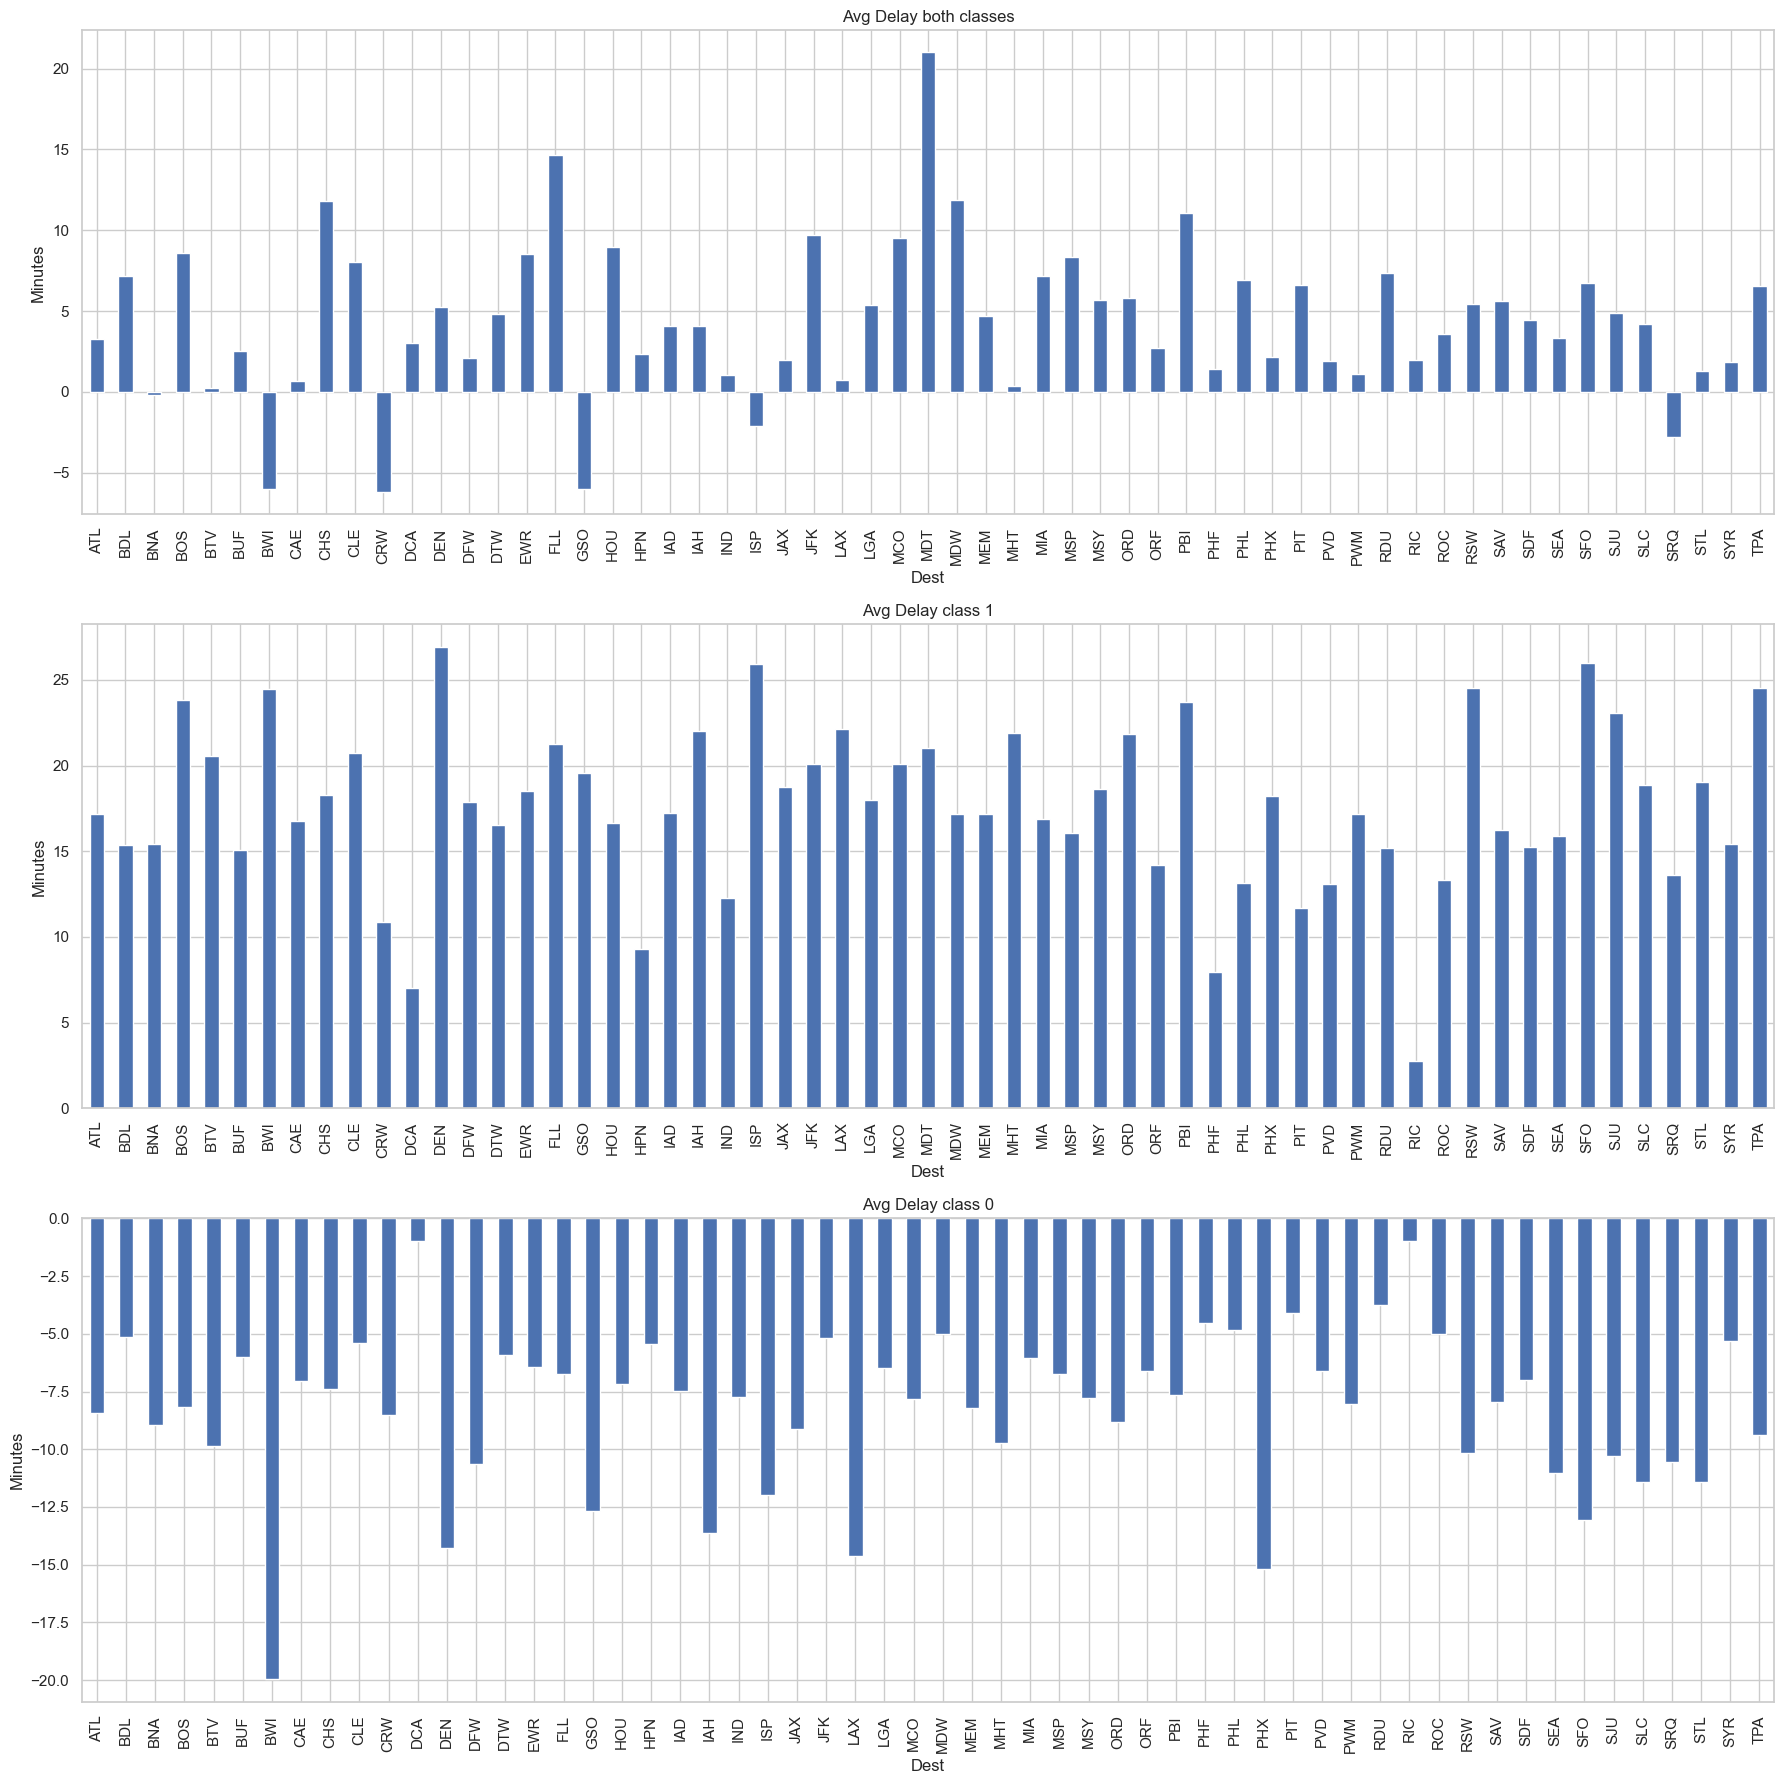

In [192]:
# Calculate average delay 

# Set up subplots in a vertical arrangement
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 18))

# Avg Delay both classes
average_delay_minutes = df.groupby('Dest')['ArrDelay'].mean()
average_delay_minutes.plot(kind='bar', ax=axes[0], title='Avg Delay both classes')
axes[0].set_ylabel('Minutes')

# Avg Delay class 1
average_delay_minutes_class_1 = df_class_1.groupby('Dest')['ArrDelay'].mean()
average_delay_minutes_class_1.plot(kind='bar', ax=axes[1], title='Avg Delay class 1')
axes[1].set_ylabel('Minutes')

# Avg Delay class 0
average_delay_minutes_class_0 = df_class_0.groupby('Dest')['ArrDelay'].mean()
average_delay_minutes_class_0.plot(kind='bar', ax=axes[2], title='Avg Delay class 0')
axes[2].set_ylabel('Minutes')

# Adjust layout
plt.tight_layout()
plt.show()

Combined both plots

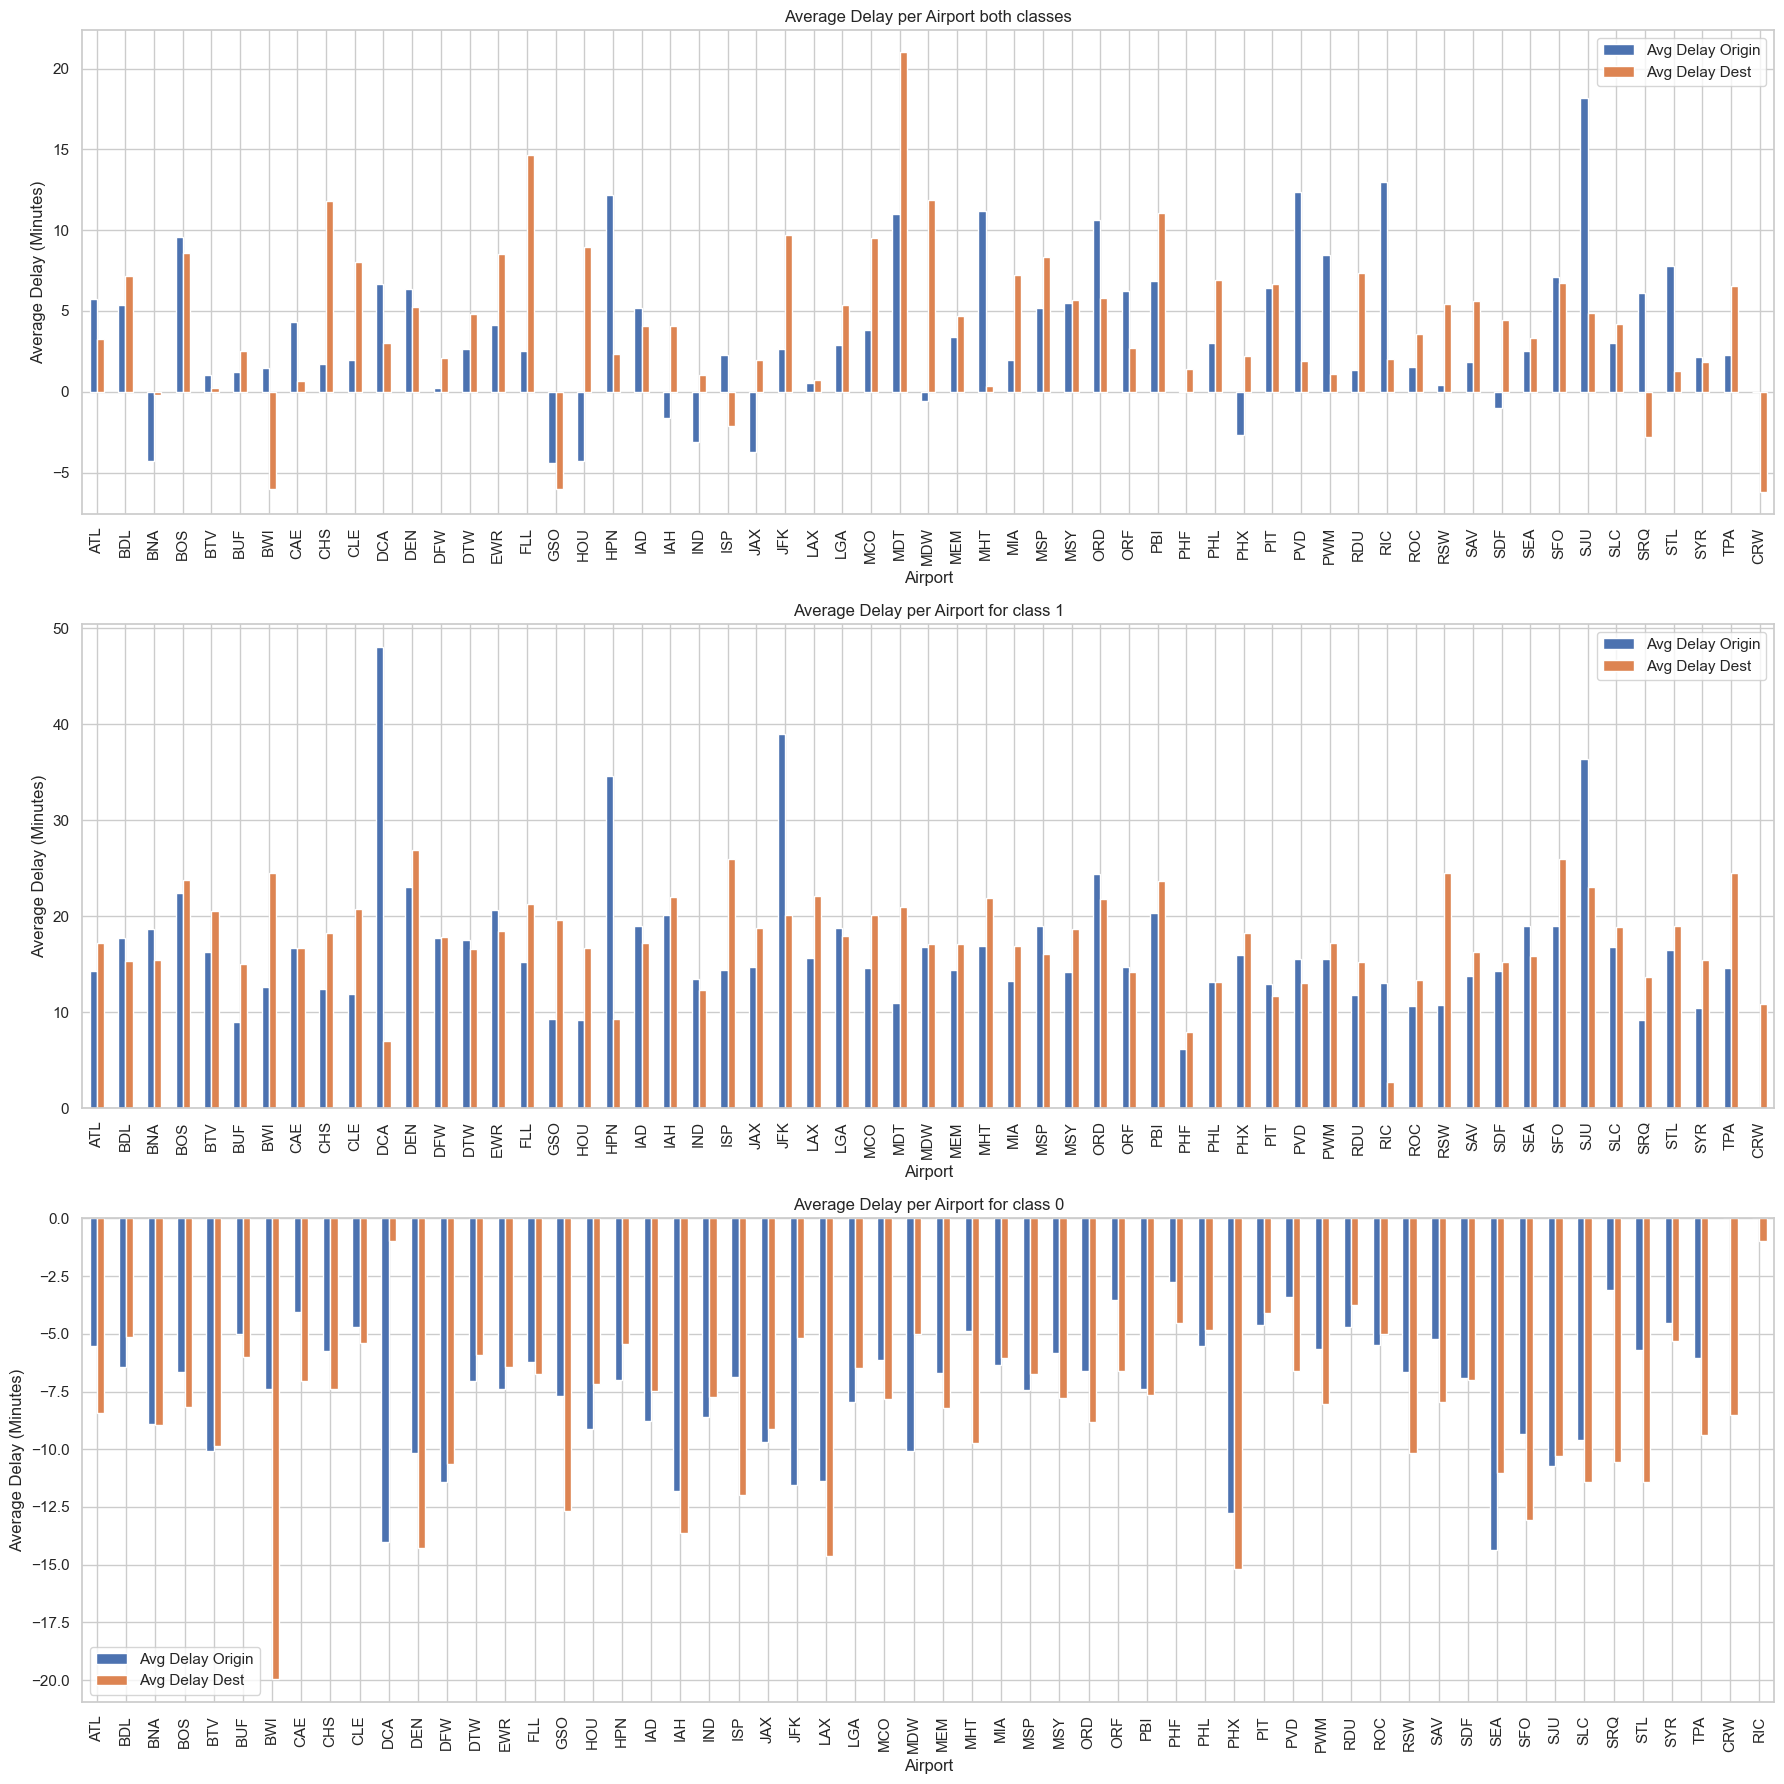

In [200]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 18))

# plot one bar plot for each airport (Origin and Dest)
average_delay_origin_both_classes = df.groupby('Origin')['ArrDelay'].mean()
average_delay_dest_both_classes = df.groupby('Dest')['ArrDelay'].mean()
combined_data = pd.concat([average_delay_origin_both_classes, average_delay_dest_both_classes], axis=1)
combined_data.columns = ['Avg Delay Origin', 'Avg Delay Dest']
combined_data.plot(kind='bar', ax=axes[0], title='Average Delay per Airport both classes')
axes[0].set_ylabel('Average Delay (Minutes)')
axes[0].set_xlabel('Airport')

# plot one bar plot for each airport (Origin and Dest) for class 1
average_delay_origin_class_1 = df_class_1.groupby('Origin')['ArrDelay'].mean()
average_delay_dest_class_1 = df_class_1.groupby('Dest')['ArrDelay'].mean()
combined_data = pd.concat([average_delay_origin_class_1, average_delay_dest_class_1], axis=1)
combined_data.columns = ['Avg Delay Origin', 'Avg Delay Dest']
combined_data.plot(kind='bar', ax=axes[1], title='Average Delay per Airport for class 1')
axes[1].set_ylabel('Average Delay (Minutes)')
axes[1].set_xlabel('Airport')

# plot one bar plot for each airport (Origin and Dest) for class 0
average_delay_origin_class_0 = df_class_0.groupby('Origin')['ArrDelay'].mean()
average_delay_dest_class_0 = df_class_0.groupby('Dest')['ArrDelay'].mean()
combined_data = pd.concat([average_delay_origin_class_0, average_delay_dest_class_0], axis=1)
combined_data.columns = ['Avg Delay Origin', 'Avg Delay Dest']
combined_data.plot(kind='bar', ax=axes[2], title='Average Delay per Airport for class 0')
axes[2].set_ylabel('Average Delay (Minutes)')
axes[2].set_xlabel('Airport')

plt.tight_layout()
plt.show()

## Continue

## Assotiation rules

We want to find the assotiation rules for

- Arrival -> Delay
- Destination -> Delay
- Arrival,Destination -> Delay

and maybe the opposite of this?

In [21]:
df

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay,Class,Flight,TimeWindow,Status
0,5,06:00,UA,899,ORD,IAD,-3,0,UA899,Morning,On Time
1,5,06:15,DL,357,IAD,ATL,5,1,DL357,Morning,On Time
2,5,06:15,UA,341,IAD,DEN,8,1,UA341,Morning,Late
3,5,06:25,CO,581,IAD,DEN,44,1,CO581,Morning,Really Late
4,5,06:30,UA,902,CLE,IAD,-10,0,UA902,Morning,Early
...,...,...,...,...,...,...,...,...,...,...,...
100156,6,21:40,UA,3,LAX,IAD,-19,0,UA3,Evening,Early
100157,6,21:40,CO,896,LAX,IAD,-23,0,CO896,Evening,Really Early
100158,6,21:50,UA,1094,IAD,BDL,-14,0,UA1094,Evening,Early
100159,6,21:55,US,394,PIT,IAD,9,1,US394,Evening,Late


In [22]:
df_assotiation = df.drop(["CRSDepTime","FlightNum", "ArrDelay", "Class", "Flight"], axis=1)

In [23]:
df_assotiation

,DayofWeek,UniqueCarrier,Origin,Dest,TimeWindow,Status
0,5,UA,ORD,IAD,Morning,On Time
1,5,DL,IAD,ATL,Morning,On Time
2,5,UA,IAD,DEN,Morning,Late
3,5,CO,IAD,DEN,Morning,Really Late
4,5,UA,CLE,IAD,Morning,Early
...,...,...,...,...,...,...
100156,6,UA,LAX,IAD,Evening,Early
100157,6,CO,LAX,IAD,Evening,Really Early
100158,6,UA,IAD,BDL,Evening,Early
100159,6,US,PIT,IAD,Evening,Late


### df_assotiation_1

In [112]:
df_assotiation_1 = df_assotiation.drop(["UniqueCarrier","DayofWeek", "TimeWindow"], axis=1)
print(df_assotiation_1)
df_assotiation_1 = df_assotiation_1.astype(str)
df_assotiation_1 = df_assotiation_1.values.tolist()

       Origin Dest        Status
0         ORD  IAD       On Time
1         IAD  ATL       On Time
2         IAD  DEN          Late
3         IAD  DEN   Really Late
4         CLE  IAD         Early
...       ...  ...           ...
100156    LAX  IAD         Early
100157    LAX  IAD  Really Early
100158    IAD  BDL         Early
100159    PIT  IAD          Late
100160    SFO  IAD         Early

[100161 rows x 3 columns]


In [65]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Encoding categorical variables
te = TransactionEncoder()
#encoded_data = te.fit_transform(df_assotiation.astype(str))
encoded_data = te.fit(df_assotiation_1).transform(df_assotiation_1)
df_encoded = pd.DataFrame(encoded_data, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

In [66]:
frequent_itemsets

,support,itemsets
0,0.056579,(ATL)
1,0.035722,(BDL)
2,0.044119,(BOS)
3,0.016523,(BUF)
4,0.010563,(CHS)
...,...,...
128,0.011172,"(IAD, PIT, Late)"
129,0.011651,"(IAD, On Time, MCO)"
130,0.015874,"(IAD, On Time, ORD)"
131,0.015036,"(IAD, On Time, PIT)"


In [67]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Association Rules:
        antecedents     consequents   support  confidence      lift
0             (ATL)         (Early)  0.016004    0.282866  0.950359
1             (ATL)           (IAD)  0.056579    1.000000  1.000000
2             (ATL)          (Late)  0.013548    0.239457  1.100950
3             (ATL)       (On Time)  0.020617    0.364390  1.098501
4             (BDL)           (IAD)  0.035722    1.000000  1.000000
..              ...             ...       ...         ...       ...
151  (On Time, PIT)           (IAD)  0.015036    1.000000  1.000000
152           (PIT)  (IAD, On Time)  0.015036    0.439323  1.324396
153      (IAD, ROC)       (On Time)  0.011042    0.471843  1.422431
154  (On Time, ROC)           (IAD)  0.011042    1.000000  1.000000
155           (ROC)  (IAD, On Time)  0.011042    0.471843  1.422431

[156 rows x 5 columns]


Arrival_Destination -> Delay

In [84]:
df_assotiation

,DayofWeek,UniqueCarrier,Origin,Dest,TimeWindow,Status
0,5,UA,ORD,IAD,Morning,On Time
1,5,DL,IAD,ATL,Morning,On Time
2,5,UA,IAD,DEN,Morning,Late
3,5,CO,IAD,DEN,Morning,Really Late
4,5,UA,CLE,IAD,Morning,Early
...,...,...,...,...,...,...
100156,6,UA,LAX,IAD,Evening,Early
100157,6,CO,LAX,IAD,Evening,Really Early
100158,6,UA,IAD,BDL,Evening,Early
100159,6,US,PIT,IAD,Evening,Late


In [100]:
df_assotiation_tmp = df_assotiation.copy()

In [101]:
df_assotiation_tmp['Route'] = df_assotiation['Origin'].astype(str) + ' to ' + df_assotiation['Dest'].astype(str)
df_assotiation_tmp = df_assotiation_tmp.drop(["UniqueCarrier","DayofWeek", "TimeWindow","Origin","Dest"], axis=1)
print(df_assotiation_tmp)
df_assotiation_tmp = df_assotiation_tmp.astype(str)
df_assotiation_tmp = df_assotiation_tmp.values.tolist()

              Status       Route
0            On Time  ORD to IAD
1            On Time  IAD to ATL
2               Late  IAD to DEN
3        Really Late  IAD to DEN
4              Early  CLE to IAD
...              ...         ...
100156         Early  LAX to IAD
100157  Really Early  LAX to IAD
100158         Early  IAD to BDL
100159          Late  PIT to IAD
100160         Early  SFO to IAD

[100161 rows x 2 columns]


In [90]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Encoding categorical variables
te = TransactionEncoder()
#encoded_data = te.fit_transform(df_assotiation.astype(str))
encoded_data = te.fit(df_assotiation_tmp).transform(df_assotiation_tmp)
df_encoded = pd.DataFrame(encoded_data, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)

In [91]:
frequent_itemsets

,support,itemsets
0,0.028155,(ATL to IAD)
1,0.017921,(BDL to IAD)
2,0.002935,(BNA to IAD)
3,0.022064,(BOS to IAD)
4,0.003255,(BTV to IAD)
...,...,...
367,0.003225,"(On Time, STL to IAD)"
368,0.001857,"(On Time, SYR to IAD)"
369,0.004852,"(On Time, TPA to IAD)"
370,0.001797,"(Really Late, PIT to IAD)"


In [92]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Association Rules:
      antecedents    consequents   support  confidence      lift
0    (ATL to IAD)        (Early)  0.005970    0.212057  0.712459
1    (ATL to IAD)         (Late)  0.007498    0.266312  1.224424
2    (ATL to IAD)      (On Time)  0.012071    0.428723  1.292441
3    (BDL to IAD)        (Early)  0.005182    0.289136  0.971428
4    (BDL to IAD)         (Late)  0.004014    0.223955  1.029681
..            ...            ...       ...         ...       ...
243  (STL to IAD)      (On Time)  0.003225    0.358093  1.079517
244  (SYR to IAD)      (On Time)  0.001857    0.510989  1.540442
245  (TPA to IAD)      (On Time)  0.004852    0.410473  1.237423
246  (PIT to IAD)  (Really Late)  0.001797    0.105820  1.136262
247  (SFO to IAD)  (Really Late)  0.001957    0.140301  1.506502

[248 rows x 5 columns]


### df_assotiation_2

In [114]:
df_assotiation_2 = df_assotiation.drop(["UniqueCarrier", "Dest", "TimeWindow", "DayofWeek"], axis=1)
print(df_assotiation_2)
df_assotiation_2 = df_assotiation_2.astype(str)
df_assotiation_2 = df_assotiation_2.values.tolist()

       Origin        Status
0         ORD       On Time
1         IAD       On Time
2         IAD          Late
3         IAD   Really Late
4         CLE         Early
...       ...           ...
100156    LAX         Early
100157    LAX  Really Early
100158    IAD         Early
100159    PIT          Late
100160    SFO         Early

[100161 rows x 2 columns]


In [71]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Encoding categorical variables
te = TransactionEncoder()
#encoded_data = te.fit_transform(df_assotiation.astype(str))
encoded_data = te.fit(df_assotiation_2).transform(df_assotiation_2)
df_encoded = pd.DataFrame(encoded_data, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

In [72]:
frequent_itemsets

,support,itemsets
0,0.028155,(ATL)
1,0.017921,(BDL)
2,0.022064,(BOS)
3,0.014557,(CLE)
4,0.029063,(DEN)
5,0.021416,(DFW)
6,0.021725,(DTW)
7,0.019399,(EWR)
8,0.297641,(Early)
9,0.501483,(IAD)


In [73]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Association Rules:
             antecedents    consequents   support  confidence      lift
0                  (ATL)      (On Time)  0.012071    0.428723  1.292441
1                  (IAD)        (Early)  0.144877    0.288897  0.970622
2                (Early)          (IAD)  0.144877    0.486750  0.970622
3                  (IAD)         (Late)  0.114166    0.227657  1.046701
4                 (Late)          (IAD)  0.114166    0.524902  1.046701
5                  (IAD)      (On Time)  0.153752    0.306596  0.924272
6              (On Time)          (IAD)  0.153752    0.463506  0.924272
7         (Really Early)          (IAD)  0.020797    0.621791  1.239905
8                  (IAD)  (Really Late)  0.053324    0.106333  1.141769
9          (Really Late)          (IAD)  0.053324    0.572577  1.141769
10  (Really Really Late)          (IAD)  0.014567    0.548290  1.093338


### df_assotiation_all

In [110]:
df_assotiation_all = df_assotiation.astype(str)
df_assotiation_all = df_assotiation_all.values.tolist()

In [69]:
df_assotiation

[[5, 'UA', 'ORD', 'IAD', 'Morning', 'On Time'],
 [5, 'DL', 'IAD', 'ATL', 'Morning', 'On Time'],
 [5, 'UA', 'IAD', 'DEN', 'Morning', 'Late'],
 [5, 'CO', 'IAD', 'DEN', 'Morning', 'Really Late'],
 [5, 'UA', 'CLE', 'IAD', 'Morning', 'Early'],
 [5, 'EA', 'CLE', 'IAD', 'Morning', 'Early'],
 [5, 'UA', 'EWR', 'IAD', 'Morning', 'Early'],
 [5, 'UA', 'IAD', 'RIC', 'Morning', 'On Time'],
 [5, 'UA', 'DTW', 'IAD', 'Morning', 'Early'],
 [5, 'UA', 'BOS', 'IAD', 'Morning', 'On Time'],
 [5, 'UA', 'LGA', 'IAD', 'Morning', 'Early'],
 [5, 'UA', 'CAE', 'IAD', 'Morning', 'Early'],
 [5, 'CO', 'BOS', 'IAD', 'Morning', 'Late'],
 [5, 'UA', 'IAD', 'LGA', 'Morning', 'Early'],
 [5, 'UA', 'BDL', 'IAD', 'Morning', 'Early'],
 [5, 'EA', 'IAD', 'ATL', 'Morning', 'Late'],
 [5, 'CO', 'ISP', 'IAD', 'Morning', 'On Time'],
 [5, 'NW', 'IAD', 'MSP', 'Morning', 'Late'],
 [5, 'UA', 'TPA', 'IAD', 'Morning', 'Early'],
 [5, 'UA', 'FLL', 'IAD', 'Morning', 'Early'],
 [5, 'UA', 'RSW', 'IAD', 'Morning', 'Early'],
 [5, 'AA', 'IAD', 'ORD

In [77]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Encoding categorical variables
te = TransactionEncoder()
#encoded_data = te.fit_transform(df_assotiation.astype(str))
encoded_data = te.fit(df_assotiation_all).transform(df_assotiation_all)
df_encoded = pd.DataFrame(encoded_data, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)


In [78]:
frequent_itemsets

,support,itemsets
0,0.144857,(1)
1,0.145306,(2)
2,0.146624,(3)
3,0.145526,(4)
4,0.147562,(5)
...,...,...
882,0.012690,"(Early, IAD, Morning, 6, UA)"
883,0.012809,"(IAD, On Time, Morning, 6, UA)"
884,0.011382,"(Early, 7, IAD, Afternoon, UA)"
885,0.013618,"(7, IAD, On Time, Afternoon, UA)"


In [79]:

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Association Rules:
           antecedents            consequents   support  confidence      lift
0                 (AA)                    (1)  0.012400    0.144084  0.994662
1                  (1)            (Afternoon)  0.058735    0.405472  0.985048
2          (Afternoon)                    (1)  0.058735    0.142691  0.985048
3                 (CO)                    (1)  0.012899    0.140145  0.967475
4              (Early)                    (1)  0.044418    0.149235  1.030226
...                ...                    ...       ...         ...       ...
3549  (UA, 7, Morning)           (Early, IAD)  0.012570    0.449322  1.509611
3550        (Early, 7)     (IAD, Morning, UA)  0.012570    0.285229  1.188980
3551  (Early, Morning)           (IAD, 7, UA)  0.012570    0.103349  1.206475
3552      (7, Morning)       (Early, IAD, UA)  0.012570    0.281404  1.440028
3553           (7, UA)  (Early, IAD, Morning)  0.012570    0.146737  1.206475

[3554 rows x 5 columns]


### Grid Search

In [109]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# write the assotioa rule you want to test
assotiation_rule = "Route"

te = TransactionEncoder()
encoded_data = te.fit(df_assotiation_tmp).transform(df_assotiation_tmp)
df_encoded = pd.DataFrame(encoded_data, columns=te.columns_)

support_thresholds = [0.001, 0.002, 0.005, 0.01]

#metrics_to_test = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
#metrics_to_test = ['confidence', 'lift']

folder_path = "data/AssotiationRules/"

for support_threshold in support_thresholds:
    frequent_itemsets = apriori(df_encoded, min_support=support_threshold, use_colnames=True)
    
    # for metric in metrics_to_test:
    #     rules = association_rules(frequent_itemsets, metric=metrics_to_test, min_threshold=0.01) 
    #     filename = f"{assotiation_rule}_support{support_threshold}.xlsx"
    #     rules.to_excel(folder_path + filename, index=False)
    #     print(f"Association rules saved to: {folder_path}{filename}")

    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
    filename = f"{assotiation_rule}_support{support_threshold}.xlsx"
    rules.to_excel(folder_path + filename, index=False)
    print(f"Association rules saved to: {folder_path}{filename}")




Association rules saved to: data/AssotiationRules/Route_support0.001.xlsx
Association rules saved to: data/AssotiationRules/Route_support0.002.xlsx
Association rules saved to: data/AssotiationRules/Route_support0.005.xlsx
Association rules saved to: data/AssotiationRules/Route_support0.01.xlsx


For All data

In [111]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# write the assotioa rule you want to test
assotiation_rule = "All"
df_target = df_assotiation_all

te = TransactionEncoder()
encoded_data = te.fit(df_target).transform(df_target)
df_encoded = pd.DataFrame(encoded_data, columns=te.columns_)

support_thresholds = [0.001, 0.002, 0.005, 0.01]

folder_path = f"data/AssotiationRules/{assotiation_rule}/"

for support_threshold in support_thresholds:
    frequent_itemsets = apriori(df_encoded, min_support=support_threshold, use_colnames=True)

    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
    filename = f"{assotiation_rule}_support{support_threshold}.xlsx"
    rules.to_excel(folder_path + filename, index=False)
    print(f"Association rules saved to: {folder_path}{filename}")

Association rules saved to: data/AssotiationRules/All/All_support0.001.xlsx
Association rules saved to: data/AssotiationRules/All/All_support0.002.xlsx
Association rules saved to: data/AssotiationRules/All/All_support0.005.xlsx
Association rules saved to: data/AssotiationRules/All/All_support0.01.xlsx


Arrival,Destination -> Delay 

In [113]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# write the assotioa rule you want to test
assotiation_rule = "RouteNotMerged"
df_target = df_assotiation_1

te = TransactionEncoder()
encoded_data = te.fit(df_target).transform(df_target)
df_encoded = pd.DataFrame(encoded_data, columns=te.columns_)

support_thresholds = [0.001, 0.002, 0.005, 0.01]

folder_path = f"data/AssotiationRules/{assotiation_rule}/"

for support_threshold in support_thresholds:
    frequent_itemsets = apriori(df_encoded, min_support=support_threshold, use_colnames=True)

    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
    filename = f"{assotiation_rule}_support{support_threshold}.xlsx"
    rules.to_excel(folder_path + filename, index=False)
    print(f"Association rules saved to: {folder_path}{filename}")

Association rules saved to: data/AssotiationRules/RouteNotMerged/RouteNotMerged_support0.001.xlsx
Association rules saved to: data/AssotiationRules/RouteNotMerged/RouteNotMerged_support0.002.xlsx
Association rules saved to: data/AssotiationRules/RouteNotMerged/RouteNotMerged_support0.005.xlsx
Association rules saved to: data/AssotiationRules/RouteNotMerged/RouteNotMerged_support0.01.xlsx


Arrival -> Delay

In [115]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# write the assotioa rule you want to test
assotiation_rule = "Arrival"
df_target = df_assotiation_2

te = TransactionEncoder()
encoded_data = te.fit(df_target).transform(df_target)
df_encoded = pd.DataFrame(encoded_data, columns=te.columns_)

support_thresholds = [0.001, 0.002, 0.005, 0.01]

folder_path = f"data/AssotiationRules/{assotiation_rule}/"

for support_threshold in support_thresholds:
    frequent_itemsets = apriori(df_encoded, min_support=support_threshold, use_colnames=True)

    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
    filename = f"{assotiation_rule}_support{support_threshold}.xlsx"
    rules.to_excel(folder_path + filename, index=False)
    print(f"Association rules saved to: {folder_path}{filename}")

Association rules saved to: data/AssotiationRules/Arrival/Arrival_support0.001.xlsx
Association rules saved to: data/AssotiationRules/Arrival/Arrival_support0.002.xlsx
Association rules saved to: data/AssotiationRules/Arrival/Arrival_support0.005.xlsx
Association rules saved to: data/AssotiationRules/Arrival/Arrival_support0.01.xlsx


Destination -> Delay

In [117]:
df_assotiation_4 = df_assotiation.drop(["UniqueCarrier", "Origin", "TimeWindow", "DayofWeek"], axis=1)
print(df_assotiation_4)
df_assotiation_4 = df_assotiation_4.astype(str)
df_assotiation_4 = df_assotiation_4.values.tolist()

       Dest        Status
0       IAD       On Time
1       ATL       On Time
2       DEN          Late
3       DEN   Really Late
4       IAD         Early
...     ...           ...
100156  IAD         Early
100157  IAD  Really Early
100158  BDL         Early
100159  IAD          Late
100160  IAD         Early

[100161 rows x 2 columns]


In [118]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# write the assotioa rule you want to test
assotiation_rule = "Destination"
df_target = df_assotiation_4

te = TransactionEncoder()
encoded_data = te.fit(df_target).transform(df_target)
df_encoded = pd.DataFrame(encoded_data, columns=te.columns_)

support_thresholds = [0.001, 0.002, 0.005, 0.01]

folder_path = f"data/AssotiationRules/{assotiation_rule}/"

for support_threshold in support_thresholds:
    frequent_itemsets = apriori(df_encoded, min_support=support_threshold, use_colnames=True)

    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
    filename = f"{assotiation_rule}_support{support_threshold}.xlsx"
    rules.to_excel(folder_path + filename, index=False)
    print(f"Association rules saved to: {folder_path}{filename}")

Association rules saved to: data/AssotiationRules/Destination/Destination_support0.001.xlsx
Association rules saved to: data/AssotiationRules/Destination/Destination_support0.002.xlsx
Association rules saved to: data/AssotiationRules/Destination/Destination_support0.005.xlsx
Association rules saved to: data/AssotiationRules/Destination/Destination_support0.01.xlsx


## FPG

In [125]:
from mlxtend.frequent_patterns import fpgrowth

# write the association rule you want to test
assotiation_rule = "Destination"
df_target = df_assotiation_4

te = TransactionEncoder()
encoded_data = te.fit(df_target).transform(df_target)
df_encoded = pd.DataFrame(encoded_data, columns=te.columns_)

support_thresholds = [0.001, 0.002, 0.005, 0.01]

folder_path = f"data/AssotiationRules/FPG/{assotiation_rule}/"

for support_threshold in support_thresholds:
    frequent_itemsets = fpgrowth(df_encoded, min_support=support_threshold, use_colnames=True)

    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
    filename = f"{assotiation_rule}_support{support_threshold}.xlsx"
    rules.to_excel(folder_path + filename, index=False)
    print(f"Association rules saved to: {folder_path}{filename}")


Association rules saved to: data/AssotiationRules/FPG/Destination/Destination_support0.001.xlsx
Association rules saved to: data/AssotiationRules/FPG/Destination/Destination_support0.002.xlsx
Association rules saved to: data/AssotiationRules/FPG/Destination/Destination_support0.005.xlsx
Association rules saved to: data/AssotiationRules/FPG/Destination/Destination_support0.01.xlsx


## Model

In [18]:
df

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay,Class,Flight,TimeWindow,Status
0,5,06:00,UA,899,ORD,IAD,-3,0,UA899,Morning,On Time
1,5,06:15,DL,357,IAD,ATL,5,1,DL357,Morning,On Time
2,5,06:15,UA,341,IAD,DEN,8,1,UA341,Morning,Late
3,5,06:25,CO,581,IAD,DEN,44,1,CO581,Morning,Really Late
4,5,06:30,UA,902,CLE,IAD,-10,0,UA902,Morning,Early
...,...,...,...,...,...,...,...,...,...,...,...
100156,6,21:40,UA,3,LAX,IAD,-19,0,UA3,Evening,Early
100157,6,21:40,CO,896,LAX,IAD,-23,0,CO896,Evening,Really Early
100158,6,21:50,UA,1094,IAD,BDL,-14,0,UA1094,Evening,Early
100159,6,21:55,US,394,PIT,IAD,9,1,US394,Evening,Late


In [51]:
df_model = df.drop(["CRSDepTime","ArrDelay","Flight","Status"],axis=1).copy()
df_model

,DayofWeek,UniqueCarrier,FlightNum,Origin,Dest,Class,TimeWindow
0,5,UA,899,ORD,IAD,0,Morning
1,5,DL,357,IAD,ATL,1,Morning
2,5,UA,341,IAD,DEN,1,Morning
3,5,CO,581,IAD,DEN,1,Morning
4,5,UA,902,CLE,IAD,0,Morning
...,...,...,...,...,...,...,...
100156,6,UA,3,LAX,IAD,0,Evening
100157,6,CO,896,LAX,IAD,0,Evening
100158,6,UA,1094,IAD,BDL,0,Evening
100159,6,US,394,PIT,IAD,1,Evening


In [26]:
y = df_model.pop('Class')
X = df_model

print("Features (X) shape:", X.shape)
print("Target variable (y) shape:", y.shape)

Features (X) shape: (100161, 6)
Target variable (y) shape: (100161,)


In [27]:
x_temp = pd.get_dummies(X, columns=['UniqueCarrier'], prefix=['Carrier'])
x_temp = pd.get_dummies(x_temp, columns=['Origin'], prefix=['Origin'])
x_temp = pd.get_dummies(x_temp, columns=['Dest'], prefix=['Dest'])
x_temp = pd.get_dummies(x_temp, columns=['TimeWindow'], prefix=['TimeWindow'])
# x_temp = pd.get_dummies(x_temp,columns=['Status'], prefix=['Status'])

In [28]:
X_one_hot = x_temp.copy()

In [29]:
X_one_hot

,DayofWeek,FlightNum,Carrier_AA,Carrier_CO,Carrier_DL,Carrier_EA,Carrier_NW,Carrier_PA,Carrier_TW,Carrier_UA,...,Dest_SJU,Dest_SLC,Dest_SRQ,Dest_STL,Dest_SYR,Dest_TPA,TimeWindow_Afternoon,TimeWindow_Evening,TimeWindow_Late Night,TimeWindow_Morning
0,5,899,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,5,357,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,5,341,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,5,581,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,902,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100156,6,3,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
100157,6,896,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
100158,6,1094,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
100159,6,394,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.2, random_state=9)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (80128, 132)
Testing set shape: (20033, 132)


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import time
import datetime


models = []
models.append(('NB',  GaussianNB()))
models.append(('LR',  LogisticRegression(solver='lbfgs', max_iter=100)))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('kNN', KNeighborsClassifier()))
# models.append(('SVM', SVC()))
# models.append(('RF', RandomForestClassifier()))
# models.append(('XGB', XGBClassifier()))   

In [37]:
def perform_cross_validation(X, Y, scoring, n_splits=5,seed=9):
    """
    Perform cross-validation for a list of models.

    Parameters:
    - X (array): Input features.
    - Y (array): Target variable.
    - scoring (str or callable): Scoring metric for evaluation.
    - n_splits (int, optional): Number of splits for cross-validation. Default is 5.

    Returns:
    - results (dict): Dictionary containing cross-validation results for each model.
    """
    results = {}  # Dictionary to store results for each model
    for name, model in models:
        results[name] = []  # Initialize an empty list for storing results of each fold
        start_time = time.time()  # Record the start time for measuring elapsed time
        kfold = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
        
        # Perform cross-validation and store the results
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        
        end_time = time.time()  # Record the end time after cross-validation
        elapsed_time = end_time - start_time  # Calculate the elapsed time
        
        results[name].append(cv_results)  # Append the cross-validation results to the list
        print("%03s: %f (+/- %f) Elapsed Time: %08s" % (name, cv_results.mean(), cv_results.std(), str(datetime.timedelta(seconds=int(elapsed_time)))))
    
    return results

In [33]:
# run the def perform_cross_validation
perform_cross_validation(X_train, y_train, scoring='accuracy',n_splits=10)


 NB: 0.564909 (+/- 0.007094) Elapsed Time:  0:00:00
 LR: 0.567904 (+/- 0.009175) Elapsed Time:  0:00:12
 DT: 0.622641 (+/- 0.005075) Elapsed Time:  0:00:04
kNN: 0.606966 (+/- 0.005707) Elapsed Time:  0:01:12


{'NB': [array([0.56370897, 0.57394234, 0.56533134, 0.57019843, 0.56108823,
         0.56533134, 0.54985648, 0.5714464 , 0.55678982, 0.57139291])],
 'LR': [array([0.57044802, 0.57431674, 0.57905903, 0.57993261, 0.56595532,
         0.56520654, 0.56146262, 0.54623736, 0.56939591, 0.56702446])],
 'DT': [array([0.61837015, 0.62398602, 0.63297142, 0.62560839, 0.61986771,
         0.62198927, 0.61387745, 0.62648197, 0.61844733, 0.62481278])],
 'kNN': [array([0.60539124, 0.60763759, 0.61774616, 0.60564083, 0.60227131,
         0.60214651, 0.59715462, 0.60813678, 0.60896156, 0.61457813])]}

### Failed Discretization

In [23]:
from sklearn.preprocessing import KBinsDiscretizer

# Create a dummy DataFrame
data = {
    'feature1': np.random.rand(100) * 100,  # Continuous numeric feature
    'feature2': np.random.randint(20, 80, size=100),  # Discrete numeric feature
    'feature3': np.random.choice(['A', 'B', 'C'], size=100),  # Categorical feature
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df.head())

# # Discretize all columns
# trans_all = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
# df_discretized_all = pd.DataFrame(trans_all.fit_transform(df), columns=df.columns)

# print("\nDiscretized DataFrame (All Columns):")
# print(df_discretized_all.head())

# Discretize only selected columns
selected_columns = ['feature1', 'feature2']  # Selecting only feature1 and feature2 for discretization

data_selected = df[selected_columns].values
trans_selected = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
data_selected_discretized = trans_selected.fit_transform(data_selected)

df_discretized_selected = pd.DataFrame(data_selected_discretized, columns=selected_columns)

print("\nDiscretized DataFrame (Selected Columns):")
print(df_discretized_selected.head())


Original DataFrame:
    feature1  feature2 feature3
0  63.598084        47        A
1  23.197466        42        B
2  18.193805        75        B
3  58.880714        30        C
4  13.398379        26        A

Discretized DataFrame (Selected Columns):
   feature1  feature2
0       2.0       1.0
1       0.0       1.0
2       0.0       2.0
3       1.0       0.0
4       0.0       0.0


In [24]:
df

,feature1,feature2,feature3
0,63.598084,47,A
1,23.197466,42,B
2,18.193805,75,B
3,58.880714,30,C
4,13.398379,26,A
...,...,...,...
95,94.348029,35,A
96,52.570761,31,A
97,5.899571,72,A
98,88.071975,27,C


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import KBinsDiscretizer

# Create a dummy DataFrame
data = {
    'feature1': np.random.rand(100) * 100,  # Continuous numeric feature
    'feature2': np.random.randint(20, 80, size=100),  # Discrete numeric feature
    'feature3': np.random.randint(100,1500, size=100),  # Categorical feature
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df.head())

# Identify the column to discretize (using 'feature2' in this case)
column_to_discretize = 'feature2'

# Split the data into features (X) and target (y)
X = df.drop(columns=[column_to_discretize])
y = df[column_to_discretize]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=2)  # You can adjust the depth as needed
dt_regressor.fit(X_train, y_train)

# Use the Decision Tree to predict on the training set
train_predictions = dt_regressor.predict(X_train)

# Discretize the predictions using KBinsDiscretizer
trans_dt = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')  # You can adjust the parameters
data_dt_discretized = trans_dt.fit_transform(train_predictions.reshape(-1, 1))

df_dt_discretized = pd.DataFrame(data_dt_discretized, columns=[column_to_discretize])

# Drop the original column and replace it with the discretized version
df = df.drop(columns=[column_to_discretize])
df[df_dt_discretized.columns] = df_dt_discretized

print("\nDataFrame with Discretized Column (Decision Tree):")
print(df.head())


Original DataFrame:
    feature1  feature2  feature3
0   3.876408        53       150
1   1.727877        58       993
2   4.051787        39       314
3   4.916234        30      1116
4  16.387005        51       554

DataFrame with Discretized Column (Decision Tree):
    feature1  feature3  feature2
0   3.876408       150       1.0
1   1.727877       993       1.0
2   4.051787       314       1.0
3   4.916234      1116       1.0
4  16.387005       554       1.0


In [19]:
df

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay,Class,Flight,TimeWindow,Status
0,5,06:00,UA,899,ORD,IAD,-3,0,UA899,Morning,On Time
1,5,06:15,DL,357,IAD,ATL,5,1,DL357,Morning,On Time
2,5,06:15,UA,341,IAD,DEN,8,1,UA341,Morning,Late
3,5,06:25,CO,581,IAD,DEN,44,1,CO581,Morning,Really Late
4,5,06:30,UA,902,CLE,IAD,-10,0,UA902,Morning,Early
...,...,...,...,...,...,...,...,...,...,...,...
100156,6,21:40,UA,3,LAX,IAD,-19,0,UA3,Evening,Early
100157,6,21:40,CO,896,LAX,IAD,-23,0,CO896,Evening,Really Early
100158,6,21:50,UA,1094,IAD,BDL,-14,0,UA1094,Evening,Early
100159,6,21:55,US,394,PIT,IAD,9,1,US394,Evening,Late


In [46]:
kmeans_data = df.drop(columns=["Status","Class","CRSDepTime","Flight","ArrDelay"], axis=1)

In [47]:
kmeans_data

,DayofWeek,UniqueCarrier,FlightNum,Origin,Dest,TimeWindow
0,5,UA,899,ORD,IAD,Morning
1,5,DL,357,IAD,ATL,Morning
2,5,UA,341,IAD,DEN,Morning
3,5,CO,581,IAD,DEN,Morning
4,5,UA,902,CLE,IAD,Morning
...,...,...,...,...,...,...
100156,6,UA,3,LAX,IAD,Evening
100157,6,CO,896,LAX,IAD,Evening
100158,6,UA,1094,IAD,BDL,Evening
100159,6,US,394,PIT,IAD,Evening


In [48]:
# discretize all the conitnous variables
from sklearn.preprocessing import KBinsDiscretizer

selected_columns = ['DayofWeek', 'FlightNum']  

data_selected = kmeans_data[selected_columns].values
trans_selected = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
data_selected_discretized = trans_selected.fit_transform(data_selected)

df_discretized_selected = pd.DataFrame(data_selected_discretized, columns=selected_columns)

print("\nDiscretized DataFrame (Selected Columns):")
print(df_discretized_selected.head())


Discretized DataFrame (Selected Columns):
   DayofWeek  FlightNum
0        2.0        1.0
1        2.0        0.0
2        2.0        0.0
3        2.0        0.0
4        2.0        1.0


In [49]:
# Drop the original column and replace it with the discretized version after you make the discretization integers
df_discretized_selected = df_discretized_selected.astype(int)
kmeans_data = kmeans_data.drop(columns=selected_columns)
kmeans_data[df_discretized_selected.columns] = df_discretized_selected
kmeans_data

,UniqueCarrier,Origin,Dest,TimeWindow,DayofWeek,FlightNum
0,UA,ORD,IAD,Morning,2,1
1,DL,IAD,ATL,Morning,2,0
2,UA,IAD,DEN,Morning,2,0
3,CO,IAD,DEN,Morning,2,0
4,UA,CLE,IAD,Morning,2,1
...,...,...,...,...,...,...
100156,UA,LAX,IAD,Evening,2,0
100157,CO,LAX,IAD,Evening,2,1
100158,UA,IAD,BDL,Evening,2,1
100159,US,PIT,IAD,Evening,2,0


In [52]:
y = df_model.pop('Class')
X = kmeans_data

print("Features (X) shape:", X.shape)
print("Target variable (y) shape:", y.shape)

Features (X) shape: (100161, 6)
Target variable (y) shape: (100161,)


In [53]:
x_temp = pd.get_dummies(X, columns=['UniqueCarrier'], prefix=['Carrier'])
x_temp = pd.get_dummies(x_temp, columns=['Origin'], prefix=['Origin'])
x_temp = pd.get_dummies(x_temp, columns=['Dest'], prefix=['Dest'])
x_temp = pd.get_dummies(x_temp, columns=['TimeWindow'], prefix=['TimeWindow'])

In [54]:
X_one_hot = x_temp.copy()

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.2, random_state=9)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (80128, 132)
Testing set shape: (20033, 132)


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import time
import datetime


models = []
models.append(('NB',  GaussianNB()))
models.append(('LR',  LogisticRegression(solver='lbfgs', max_iter=100)))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('kNN', KNeighborsClassifier()))
# models.append(('SVM', SVC()))
# models.append(('RF', RandomForestClassifier()))
# models.append(('XGB', XGBClassifier())) 

In [57]:
# run the def perform_cross_validation
perform_cross_validation(X_train, y_train, scoring='accuracy',n_splits=10)

 NB: 0.569776 (+/- 0.006895) Elapsed Time:  0:00:01
 LR: 0.585264 (+/- 0.005746) Elapsed Time:  0:00:29
 DT: 0.614567 (+/- 0.006532) Elapsed Time:  0:00:08
kNN: 0.573744 (+/- 0.007750) Elapsed Time:  0:01:51


{'NB': [array([0.56458255, 0.56495694, 0.57319356, 0.57855984, 0.56795208,
         0.56308499, 0.55959067, 0.58317734, 0.57114329, 0.57151772])],
 'LR': [array([0.58317734, 0.58866841, 0.59278672, 0.58891801, 0.58504929,
         0.58380132, 0.57194559, 0.59241233, 0.58175237, 0.58412381])],
 'DT': [array([0.61337826, 0.61213029, 0.62086609, 0.61312867, 0.62011731,
         0.61375265, 0.60089854, 0.62311244, 0.60758862, 0.62069396])],
 'kNN': [array([0.56670411, 0.56520654, 0.57880943, 0.58130538, 0.58317734,
         0.58180457, 0.55946587, 0.57519032, 0.57700949, 0.56877184])]}

### Continue